In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
# ABSOLUTE POSITIONAL EMBEDDING

def abs_positional_encoding(length, dimensions):
  # 'length' is the length of sequences
  # 'dimensions' is the dimension of input embedding

  def single_pos_embed(position): #calculating for a certain position
      return [position / np.power(10000, 2 * (i // 2) / dimensions)
              for i in range(dimensions)]

  pos_enc = np.array([single_pos_embed(i) for i in range(length)]) #adding embedding for all positions
  pos_enc[:, 0::2] = np.sin(pos_enc[:, 0::2])  # dim 2i application
  pos_enc[:, 1::2] = np.cos(pos_enc[:, 1::2])  # dim 2i+1 application
  return pos_enc

abs_pe = abs_positional_encoding(length = 250,dimensions = 12)
print(f"shape of abs_pe : {abs_pe.shape}\n")
np.set_printoptions(precision=4)
print(abs_pe)

shape of abs_pe : (250, 12)

[[ 0.0000e+00  1.0000e+00  0.0000e+00 ...  1.0000e+00  0.0000e+00
   1.0000e+00]
 [ 8.4147e-01  5.4030e-01  2.1378e-01 ...  1.0000e+00  4.6416e-04
   1.0000e+00]
 [ 9.0930e-01 -4.1615e-01  4.1768e-01 ...  9.9999e-01  9.2832e-04
   1.0000e+00]
 ...
 [ 9.2681e-01 -3.7554e-01  1.9135e-01 ...  8.6172e-01  1.1440e-01
   9.9344e-01]
 [ 1.8475e-01 -9.8279e-01 -2.2903e-02 ...  8.6063e-01  1.1486e-01
   9.9338e-01]
 [-7.2716e-01 -6.8646e-01 -2.3610e-01 ...  8.5953e-01  1.1532e-01
   9.9333e-01]]


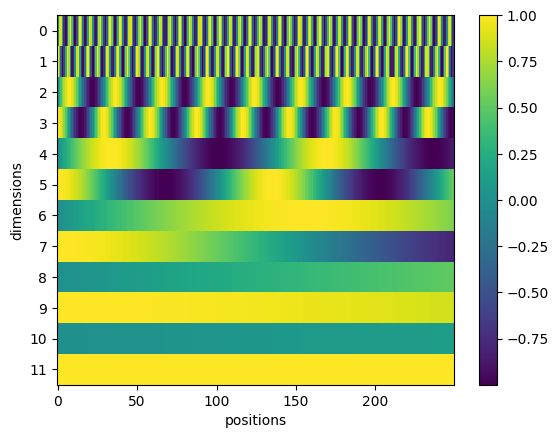

In [93]:
# visualize the positional encoding using heatmap

plt.imshow(abs_pe.T, interpolation='none', cmap='viridis', aspect='auto')
plt.xlabel('positions')
plt.ylabel('dimensions')
plt.yticks(range(0, 12, 1))
plt.colorbar()
plt.show()

In [68]:
# RELATIVE POSITIONAL EMBEDDING
def sin_single_pos_embed(rel_position, dimensions): # function that returns a sinusoidal positional embedding for a single relative position of a word w.r.t another
  embed = np.array([rel_position / np.power(10000, 2 * (i // 2) / dimensions)
              for i in range(dimensions)])
  embed[0::2] = np.sin(embed[0::2])  # dim 2i application
  embed[1::2] = np.cos(embed[1::2])  # dim 2i+1 application
  return embed

def rel_positional_encoding(length,dimensions,calc = 'simple',clip = None):
  # 'length' is the length of sequences
  # 'dimensions' is the dimension of input embedding
  # 'calc' decides the type of relative positional embedding to be used.
  # 'calc' = { 'simple' : returns the relative position value itself ..-3,-2,-1,0,1,2,3...
  #            'sin'    : return the sinusoidal absolute embedding related to relative position (assumes symmetric relation forward and backward)
  #          }
  # 'clip' decides after what relative position should it maintain the last relational embedding for the rest.
  #        for e.g.: if clip = 3, then for the 6th word, 'calc' = 'simple' gives -3,-3,-3,-2,-1,0,1,2,3,3,3..

  # depending upon 'calc' value, deciding the relative embedding calculations

  result = []
  
  if calc == "simple":

    for i in range(length):
      temp = []
      for j in range(length):
        if clip and abs(j-i) > clip: # clipping if specified
          temp.append(clip * (j-i) / abs(j-i))
        else: temp.append(j-i)
      result.append(temp)

  elif calc == "sin":

    for i in range(length):
      temp = []
      for j in range(length):
        if clip and abs(j-i) > clip: # clipping if specified
          temp.append(sin_single_pos_embed(clip * (j-i) / abs(j-i),dimensions))
        else:
          temp.append(sin_single_pos_embed(j-i,dimensions))
      result.append(temp)

  return np.array(result)



print(f"\t******* 'simple' relative positonal embedding ********")
rel_pe_simple = rel_positional_encoding(length = 7, dimensions = 10, calc = "simple", clip = 0)
print(f"shape of rel_pe_simple : {rel_pe_simple.shape}\n")
np.set_printoptions(precision=4)
print(f"The relative embedding a_(0,0) : \n{rel_pe_simple[0][0]}")
print(f"The relative embedding a_(1,1) : \n{rel_pe_simple[1][1]}\n")
print(f"The relative embedding a_(1,2) : \n{rel_pe_simple[1][2]}")
print(f"The relative embedding a_(1,0) : \n{rel_pe_simple[1][0]}")


print(f"\n\n\n\t******* 'sin' relative positonal embedding ********")
rel_pe_sin = rel_positional_encoding(length = 251, dimensions = 10, calc = "sin", clip = 0)
print(f"shape of rel_pe_sin : {rel_pe_sin.shape}\n")
np.set_printoptions(precision=4)
print(f"The relative embedding a_(0,0) : \n{rel_pe_sin[0][0]}")
print(f"The relative embedding a_(1,1) : \n{rel_pe_sin[1][1]}\n")
print(f"The relative embedding a_(1,2) : \n{rel_pe_sin[1][2]}")
print(f"The relative embedding a_(1,0) : \n{rel_pe_sin[1][0]}")

	******* 'simple' relative positonal embedding ********
shape of rel_pe_simple : (7, 7)

The relative embedding a_(0,0) : 
0
The relative embedding a_(1,1) : 
0

The relative embedding a_(1,2) : 
1
The relative embedding a_(1,0) : 
-1



	******* 'sin' relative positonal embedding ********
shape of rel_pe_sin : (251, 251, 10)

The relative embedding a_(0,0) : 
[0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
The relative embedding a_(1,1) : 
[0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]

The relative embedding a_(1,2) : 
[8.4147e-01 5.4030e-01 1.5783e-01 9.8747e-01 2.5116e-02 9.9968e-01
 3.9811e-03 9.9999e-01 6.3096e-04 1.0000e+00]
The relative embedding a_(1,0) : 
[-8.4147e-01  5.4030e-01 -1.5783e-01  9.8747e-01 -2.5116e-02  9.9968e-01
 -3.9811e-03  9.9999e-01 -6.3096e-04  1.0000e+00]


(249, 12)


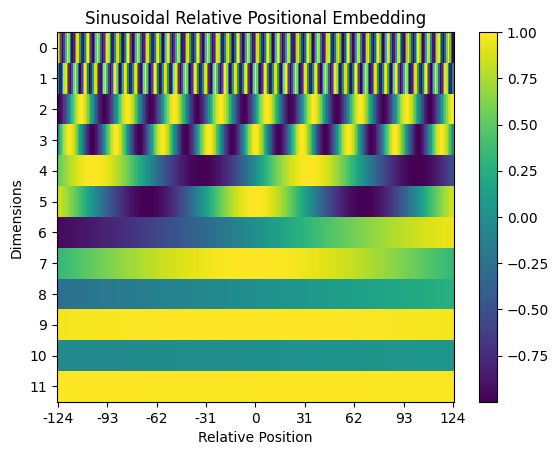

In [105]:
length = 125
relative_pos = np.arange(1-length,length)
dimensions = 12
embedding = np.array([sin_single_pos_embed(i,dimensions) for i in relative_pos])
print(embedding.shape)
plt.imshow(embedding.T, interpolation='none', cmap='viridis', aspect='auto')
plt.xticks(np.arange(0,2*length-1,31),relative_pos[0::31])
plt.yticks(np.arange(0,dimensions,1))
plt.xlabel("Relative Position")
plt.ylabel("Dimensions")
plt.title("Sinusoidal Relative Positional Embedding")
plt.colorbar()
plt.show()

In [94]:
# ROTARY POSITIONAL EMBEDDINGS

def rot_positional_encoding(length, dimensions):

  thetas = [10000 ** (-2 * (i - 1) / dimensions) for i in range(int(dimensions / 2))] # FInding the fixed theta values

  # genrating a single rotational matrix for a certain position
  def gen_rotary_pos_embed_matrix(position):
    rot_matrix = np.zeros((dimensions, dimensions))
    for i in range(int(dimensions / 2)):
      rot_matrix[(2*i)][(2*i)] =  np.cos(position * thetas[i])
      rot_matrix[(2*i)][(2*i)+1] = - np.sin(position * thetas[i])
      rot_matrix[(2*i)+1][(2*i)] =  np.sin(position * thetas[i])
      rot_matrix[(2*i)+1][(2*i)+1] =  np.cos(position * thetas[i])
    return rot_matrix


  output = []
  for i in range(length): # calculating the rotational matrices for all positions
     output.append(gen_rotary_pos_embed_matrix(i))

  return np.array(output)



rot_pe = rot_positional_encoding(length = 10, dimensions = 4)
print(f"shape of rot_pe : {rot_pe.shape}\n")
np.set_printoptions(precision=4)
print(f"rotational matrix for first word :")
print(rot_pe[0])

shape of rot_pe : (10, 4, 4)

rotational matrix for first word :
[[ 1. -0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. -0.]
 [ 0.  0.  0.  1.]]


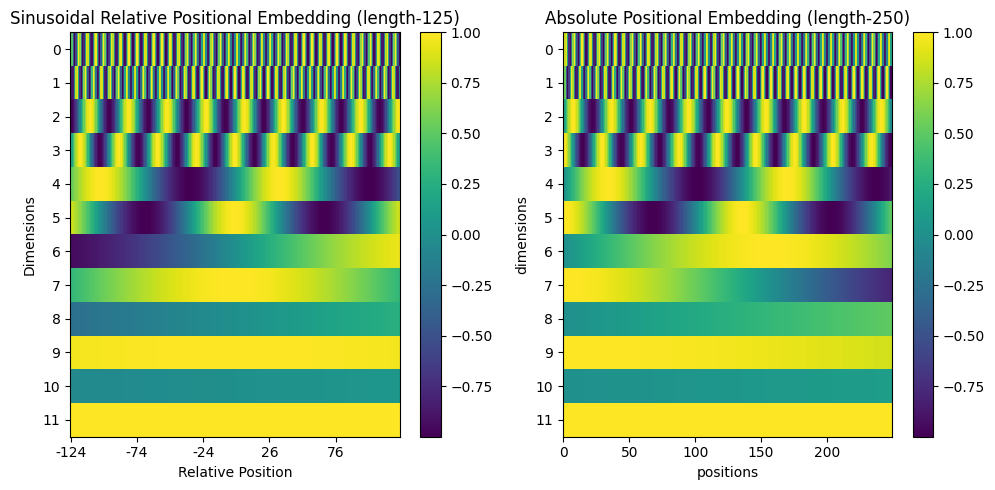

In [107]:
# Comparitive figure for sinusoidal relative and absolute positional embeddings

length = 125
relative_pos = np.arange(1-length,length)
dimensions = 12
embedding = np.array([sin_single_pos_embed(i,dimensions) for i in relative_pos])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Sinusoidal Relative Positional Embedding
im1 = axes[0].imshow(embedding.T, interpolation='none', cmap='viridis', aspect='auto')
axes[0].set_xticks(np.arange(0,2*length-1,50),relative_pos[0::50])
axes[0].set_yticks(np.arange(0,dimensions,1))
axes[0].set_xlabel("Relative Position")
axes[0].set_ylabel("Dimensions")
axes[0].set_title("Sinusoidal Relative Positional Embedding (length-125)")
cbar1 = plt.colorbar(im1, ax=axes[0])

# Absolute Positional Embedding
length = 250
abs_pe = abs_positional_encoding(length = length,dimensions = dimensions)
im2 = axes[1].imshow(abs_pe.T, interpolation='none', cmap='viridis', aspect='auto')
axes[1].set_xlabel('positions')
axes[1].set_ylabel('dimensions')
axes[1].set_yticks(range(0, 12, 1))
axes[1].set_title("Absolute Positional Embedding (length-250)")
cbar2 = plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

In the comparison, note the following:
* The total number of embeddings remain the same.
* All odd dimensions of the embedding are symmetric about the origin (relative position zero). This is because of the cos function.
* If you notice closer, the relative embedding is a shifted absolute embedding made such that the origin is at the center of the embedding. This enables is to get the relative embedding to differentiate between the positions of the two entities on opposite sides at same distance. Also enables to have unique identifier for each position regardless of the input length.